# Kulback Leibler divergence

## Formulation

In [64]:
import numpy as np
from scipy.stats import norm
from matplotlib import pyplot as plt
import seaborn as sns

Compute KL divergence of two probability distributions

In [2]:
def kl_divergence(p, q):
    prob = np.sum(np.where(p != 0, p * np.log(p / q), 0))
    return prob

KL divergence : 499.9997170653493


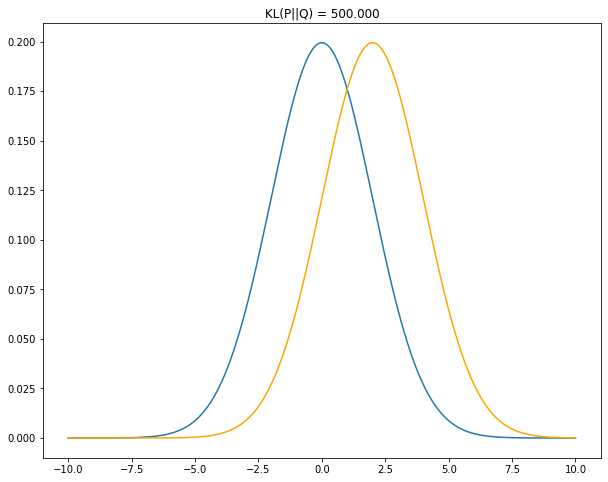

In [190]:
# plot kl divergence between two distributions

x = np.arange(-10, 10, 0.001)
p = norm.pdf(x, 0, 2)
q = norm.pdf(x, 2, 2)

print('KL divergence :', kl_divergence(p, q))

plt.title('KL(P||Q) = %1.3f' % kl_divergence(p, q))
plt.plot(x, p)
plt.plot(x, q, c='orange')

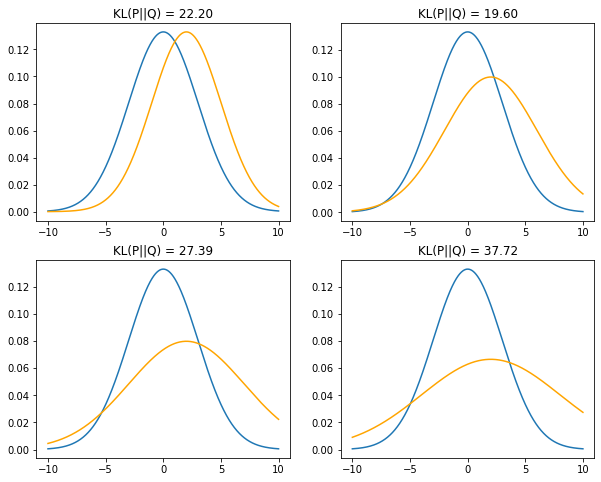

In [191]:
plt.rcParams['figure.figsize'] = [10, 8]

for i, j in enumerate(range(3,7)):
    x = np.arange(-10, 10, 0.01)
    p = norm.pdf(x, 0, 3)
    q = norm.pdf(x, 2, j)
    
    plt.subplot(2, 2, i + 1)
    plt.plot(x, p)
    plt.plot(x, q, c = 'orange')
    plt.title('KL(P||Q) = %1.2f' % kl_divergence(p, q))

# Optimizing divergence

In [192]:
import tensorflow as tf
k = tf.keras.losses.KLDivergence()
loss = k([.4, .9, .2], [.5, .8, .12])
print('Loss: ', loss.numpy())

Loss:  0.11891246


In [193]:
k(p, q).numpy()

37.724063873291016

In [197]:
x = np.arange(-10, 10, 0.001)
p_pdf = norm.pdf(x, 0, 2)
q = norm.pdf(x, 2, 2)

# norm dist with random values
np.random.seed(0)
random_mean = np.random.randint(10, size=len(p_pdf))
random_sigma = np.random.randint(10, size=len(p_pdf))
random_pdf = norm.pdf(x, random_mean, random_sigma)

/usr/local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1720: RuntimeWarning: divide by zero encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


In [200]:
def opt_kl():
                    
    # prepare optimizer
    model = tf.keras.Sequential([tf.keras.layers.Dense(units = 1, input_shape = [1])])
    model.compile(optimizer = 'sgd', loss = 'kullback_leibler_divergence')
    
    # model fitting
    record = model.fit(p_pdf,q, epochs = 10)
    return record.history['loss']

In [201]:
opt_kl()

Train on 20000 samples
Epoch 1/10
20000/20000 [==============================] - 1s 25us/sample - loss: -0.0776
Epoch 2/10
20000/20000 [==============================] - 0s 19us/sample - loss: -0.1032
Epoch 3/10
20000/20000 [==============================] - 0s 19us/sample - loss: -0.1056
Epoch 4/10
20000/20000 [==============================] - 0s 19us/sample - loss: -0.1056
Epoch 5/10
20000/20000 [==============================] - 0s 19us/sample - loss: -0.1056
Epoch 6/10
20000/20000 [==============================] - 0s 19us/sample - loss: -0.1056
Epoch 7/10
20000/20000 [==============================] - 0s 19us/sample - loss: -0.1056
Epoch 8/10
20000/20000 [==============================] - 0s 20us/sample - loss: -0.1056
Epoch 9/10
20000/20000 [==============================] - 0s 21us/sample - loss: -0.1056
Epoch 10/10
20000/20000 [==============================] - 1s 32us/sample - loss: -0.1056


[-0.07756410191357135,
 -0.1031574432194233,
 -0.10555422512292861,
 -0.10558758674263954,
 -0.10558761009573936,
 -0.10558760992884636,
 -0.10558761016726494,
 -0.10558761018514633,
 -0.10558761001825333,
 -0.1055876100242138]